In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
flight = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
flight

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
flight=flight.drop(['ID#'],axis=1)
flight

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
# Normalization

In [7]:
def minmax_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return (x)

In [8]:
df_norm = minmax_func(flight)

In [9]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


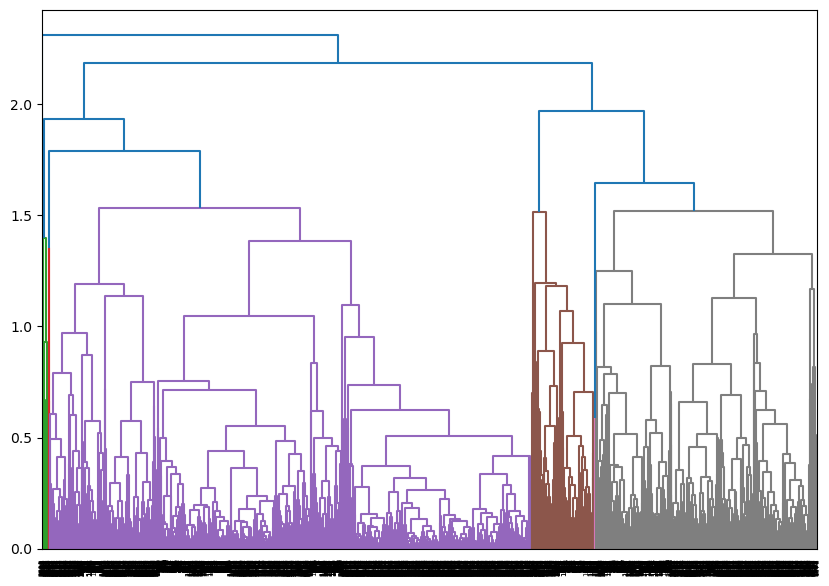

In [10]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
#methods : single , complete , centroid , average
     

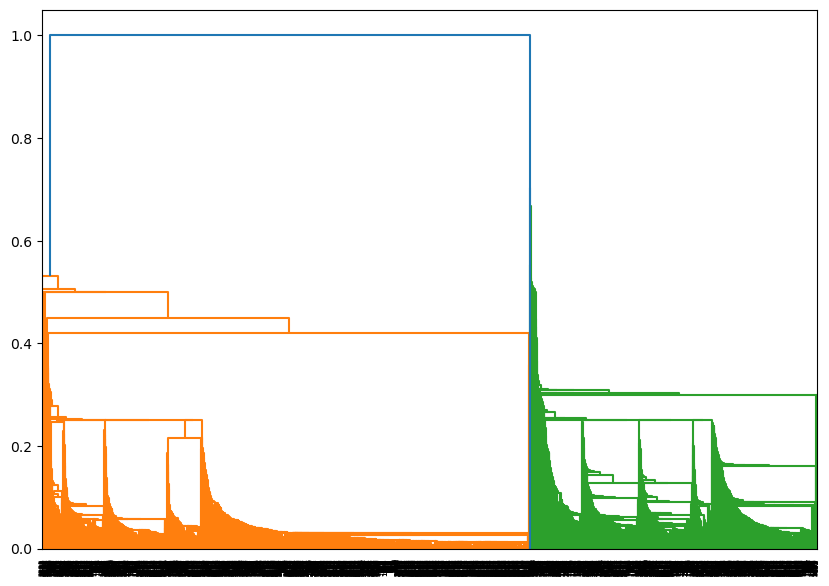

In [11]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))
     

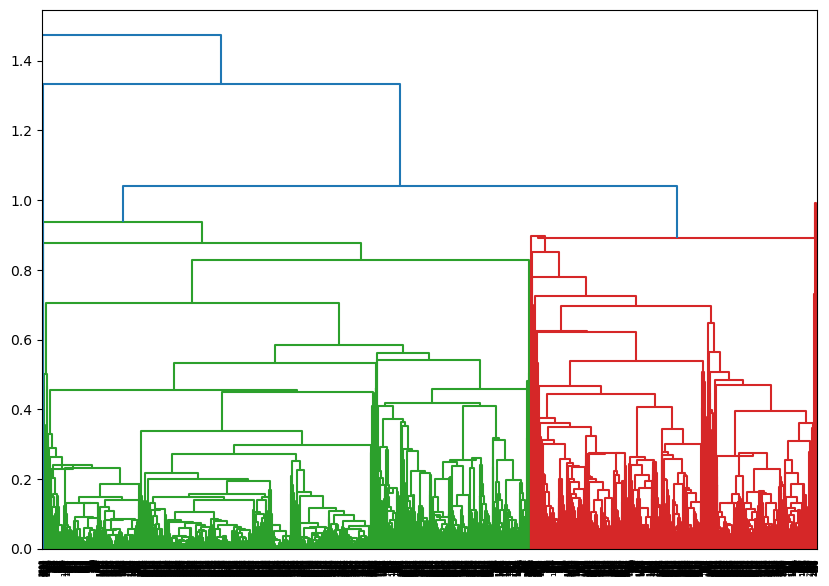

In [12]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

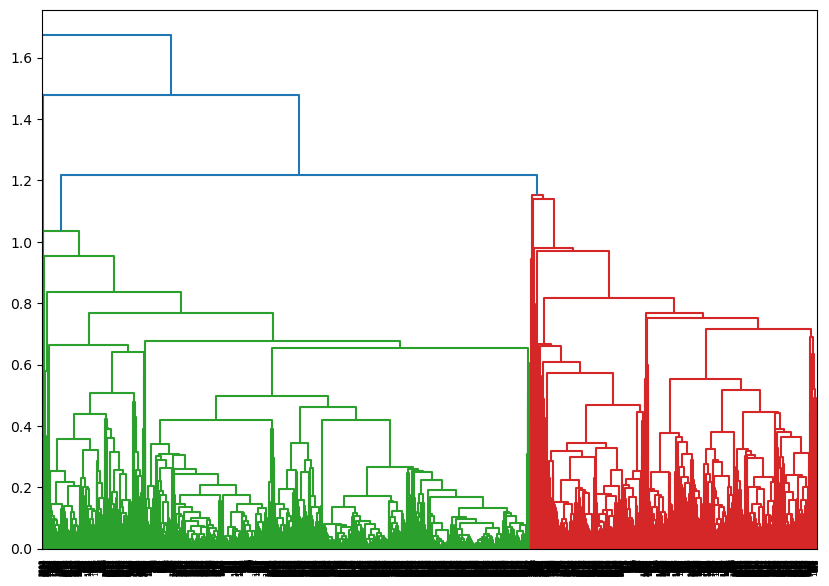

In [13]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))
     

In [14]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [15]:
hclusters = hclusters.fit_predict(df_norm)
hclusters

C:\Users\salma\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 0, 4, 4], dtype=int64)

In [16]:
flight['h_cluster_id']= hclusters
flight

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [17]:
flight[flight['h_cluster_id']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id
7,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0
17,13958,0,1,1,1,4291,5,0,0,6905,1,0
18,91473,0,3,1,1,27408,17,0,0,6903,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0


In [18]:
flight[flight['h_cluster_id']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3786,27669,0,1,1,1,3219,7,0,0,3413,0,1
3790,73159,0,1,1,1,358,4,358,4,3237,0,1
3793,38827,0,1,1,1,0,0,0,0,2993,0,1
3794,29919,0,1,1,1,1225,3,0,0,2949,0,1


In [19]:
flight[flight['h_cluster_id']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id
6,84914,0,3,1,1,27482,25,0,0,6994,0,2
10,40091,0,2,1,1,7278,10,0,0,6959,0,2
12,43382,0,2,1,1,11150,20,0,0,6924,0,2
30,177926,0,3,1,1,20797,13,0,0,7886,0,2
32,276571,0,4,1,1,42044,23,0,0,7872,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3972,35185,0,2,1,1,5957,7,0,0,1439,0,2
3974,58387,0,3,1,1,14581,39,0,0,1435,0,2
3980,28867,0,3,1,1,19169,28,0,0,1425,0,2
3985,59017,0,4,1,1,34746,25,0,0,1418,0,2


In [20]:
flight[flight['h_cluster_id']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
11,96522,0,5,1,1,61105,19,0,0,6924,1,3
15,28495,0,4,1,1,49442,15,0,0,6912,1,3
16,51890,0,4,1,1,48963,16,0,0,6910,1,3
20,120576,0,5,1,1,58831,23,250,2,6896,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3855,190730,0,5,1,1,78916,28,2450,9,1648,1,3
3881,32424,0,4,1,1,39635,16,0,0,1584,1,3
3883,126167,0,5,1,1,190160,15,0,0,1612,1,3
3908,57642,0,4,1,1,52176,15,0,0,1564,1,3


In [21]:
flight[flight['h_cluster_id']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id
976,20498,0,1,1,1,7826,20,7226,18,5491,0,4
1014,96827,1094,1,1,1,12100,19,8100,17,5801,0,4
1122,27591,0,1,1,1,8209,34,1800,16,5659,0,4
1129,1625,0,1,1,1,1375,4,0,0,1547,0,4
1236,146086,0,1,1,1,6950,17,6950,17,5345,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,11310,0,1,1,1,5021,2,0,0,1409,0,4
3992,11181,0,1,1,1,929,12,0,0,1407,0,4
3993,3974,0,1,1,1,365,3,0,0,1397,0,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [22]:
flight.groupby ('h_cluster_id').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_cluster_id,,,,,,,,,,,
0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


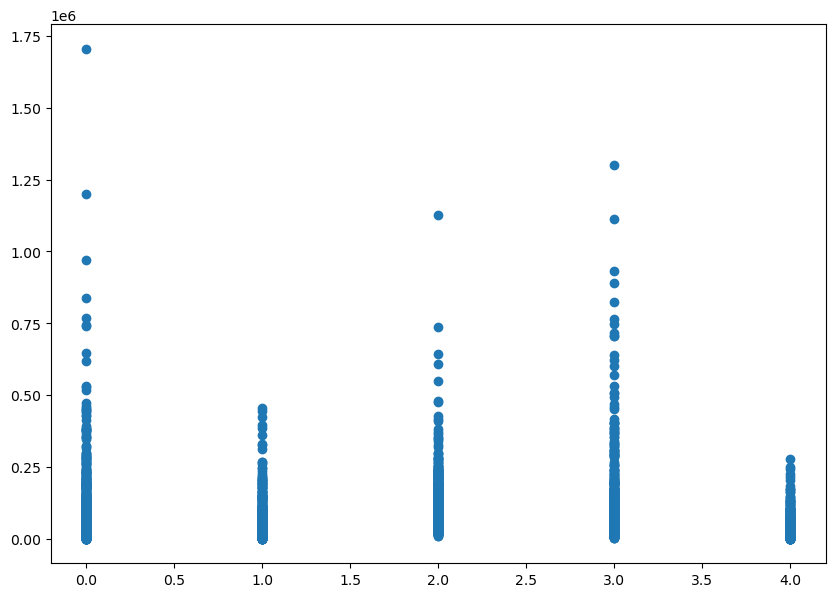

In [23]:
plt.figure(figsize=(10, 7))
plt.scatter(flight['h_cluster_id'],flight['Balance'])

In [24]:
# KMEANS

In [25]:
def norm_func(i):
  x=(i-i.mean())/(i.std())
  return(x)

In [26]:
x=norm_func(flight)
x

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823,-0.539152
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823,-0.539152
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823,-0.539152
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823,-0.539152
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755,0.884465
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755,-1.250960
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755,-1.250960
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755,-1.250960
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823,1.596274


In [27]:
#normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_flight = scaler.fit_transform(flight)
     

In [28]:
scaled_flight

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -5.39219215e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -5.39219215e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -5.39219215e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.25111675e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  1.59647340e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  1.59647340e+00]])

In [29]:
from sklearn.cluster import KMeans

C:\Users\salma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\salma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\salma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\salma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\salma\anaconda3\lib\site-packages\sklearn\clust

[47976.00000000054, 39390.850264450346, 34875.96114378124, 30794.863679993305, 27093.176038223613, 23643.68473354318, 20786.532939222627, 19189.163271556896, 16660.134840758175, 15342.61834884096]


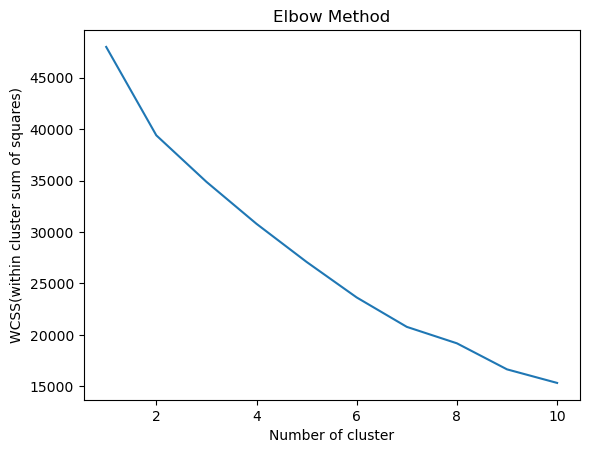

In [30]:
#WCSS(within cluster sum of square)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS(within cluster sum of squares)')
plt.show()

In [31]:
k_mean_clust = KMeans(4, random_state=0)
k_mean_clust.fit(x)

C:\Users\salma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [32]:
k_mean_clust.labels_

array([0, 0, 0, ..., 0, 2, 2])

In [33]:
flight['Kmean_clust_id'] = k_mean_clust.labels_
flight

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id,Kmean_clust_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,2


In [34]:
flight.groupby('Kmean_clust_id').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmean_clust_id,,,,,,,,,,,,
0,53541.934886,105.126901,1.462452,1.023764,1.000475,7095.510932,8.470057,243.846008,0.743821,4713.404943,0.389259,0.740970
1,135702.204126,147.755700,4.100977,1.002172,1.052117,48702.408252,19.929425,383.343105,1.154180,4925.167210,0.585233,2.412595
2,33884.861279,117.633293,1.275030,1.000000,1.000000,4668.905911,7.301568,189.709288,0.521110,1597.951749,0.000000,3.645356
3,197291.020690,838.110345,2.241379,1.041379,1.000000,33847.200000,28.737931,5630.227586,16.779310,4774.717241,0.848276,1.551724


In [35]:
# DBSCAN

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
 flight

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id,Kmean_clust_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,2


In [38]:
stscaler = StandardScaler()
X=stscaler.fit_transform(flight)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -5.39219215e-01, -8.33428277e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -5.39219215e-01, -8.33428277e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -5.39219215e-01, -8.33428277e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00, -1.25111675e+00, -8.33428277e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.59647340e+00,  1.37817071e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.59647340e+00,  1.37817071e+00]])

In [39]:
dbscan = DBSCAN(eps=4, min_samples=300)
dbscan.fit(X)
     

DBSCAN(eps=4, min_samples=300)

In [40]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
flight['DB_Cluster_id']=dbscan.labels_
flight

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id,Kmean_clust_id,DB_Cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,2,0


In [42]:
flight[flight['DB_Cluster_id']==-1]
     

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id,Kmean_clust_id,DB_Cluster_id
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0,3,-1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,3,3,-1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,3,1,-1
117,969559,0,1,1,1,2500,3,1000,2,7718,1,0,1,-1
126,602064,0,5,1,1,194753,26,2250,10,7652,1,3,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,374613,0,1,2,1,23592,31,5000,14,3463,1,0,3,-1
3837,8150,0,1,2,1,14135,41,500,2,1676,1,0,0,-1
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,3,3,-1
3851,11947,0,1,2,1,8099,14,1000,2,1656,1,0,0,-1


In [43]:
(len(flight[flight['DB_Cluster_id']==-1])/len(flight))*100

4.326081520380095

In [44]:
X=metrics.silhouette_score(X,dbscan.labels_)
X

0.6136420068203616